NameError: name 'USCOUNTIES' is not defined

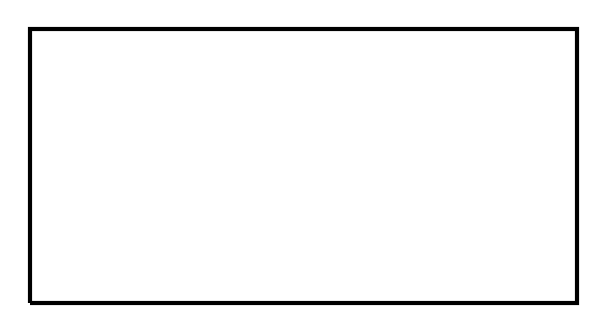

In [8]:
# Program to plot KMVX, UND radar, and DOW radar reflectivity, all at one time in a three-panel setup
# Last edit on 13 Feb 2021

import matplotlib.pyplot as plt
import pyart
import netCDF4
import os
import cartopy.crs as ccrs
import numpy as np
import metpy
# Read in files

# DOW:
fname_DOW = 'data/cfrad.20200212_084054.128_to_20200212_084123.800_DOW7low_SUR.nc'

# UND:
fname_UND = 'data/UND200212084005.RAWM9SL'

# Mayville:
fname_MVX = 'data/KMVX20200212_084002_V06'

# Process DOW first:
radar_DOW = pyart.io.read_cfradial(fname_DOW)
radar_DOW.metadata['instrument_name'] = 'DOW7low'
radar_DOW.azimuth['data'] = (radar_DOW.azimuth['data'] - 180.) % 360. #Rotating image 180 deg to orient with north
display_DOW = pyart.graph.RadarMapDisplay(radar_DOW)

center_lon = radar_DOW.longitude['data'][0]
center_lat = radar_DOW.latitude['data'][0]

min_lat = center_lat - 0.8
max_lat = center_lat + 0.8
min_lon = center_lon - 0.8
max_lon = center_lon + 0.8


# Process UND second:
radar_UND = pyart.io.read(fname_UND)
display_UND = pyart.graph.RadarMapDisplay(radar_UND)

#Use gatefilter to mask out noise and ground clutter around radar
gatefilter = pyart.correct.GateFilter(radar_UND)
gatefilter.exclude_below('cross_correlation_ratio', 0.92, exclude_masked = True)


# Finally, process KMVX:
radar_MVX = pyart.io.read(fname_MVX)

center_lon_MVX = radar_MVX.longitude['data'][0]
center_lat_MVX = radar_MVX.latitude['data'][0]

display_MVX = pyart.graph.RadarMapDisplay(radar_MVX)



# Time to plot a 1x3 plot
projection = ccrs.PlateCarree()
fig = plt.figure(figsize = [8,4],dpi=300)

#DOW
ax1 = fig.add_subplot(131, projection = projection)
ax1.add_feature(USCOUNTIES.with_scale('5m'))
display_DOW.plot_ppi_map('DBZHC',
        0,
        vmin = -20,
        vmax = 40,
        min_lon = min_lon,
        max_lon = max_lon,
        min_lat = min_lat,
        max_lat = max_lat,
        resolution = '10m',
        projection = projection,
        colorbar_flag = 0,
        fig = fig,
        lat_0 = center_lat,
        lon_0 = center_lon,
        title = 'DOW',
        cmap = 'rainbow')
display_DOW.plot_point(-97.1747, 47.8025)
ax1.text(-97.94, 48.46, '(a)',fontsize=12, fontweight='bold',transform=projection)

#UND
ax2 = fig.add_subplot(132, projection = projection)
#ax2.add_feature(USCOUNTIES.with_scale('5m'))
display_UND.plot_ppi_map('reflectivity',
        3, #Sweep number 0=0.5deg, 1=1.0deg, 2=1.5deg, 3=2.0deg, 4=2.75deg, 5=3.5deg, 6=4.25deg, 7=5.0deg, 8=6.0deg, 9=7.0deg
        vmin = -20,
        vmax = 40,
        min_lon = min_lon,
        max_lon = max_lon,
        min_lat = min_lat,
        max_lat = max_lat,
        resolution = '10m',
        projection = projection,
        colorbar_flag = 0,
        fig = fig,
        lat_0 = center_lat,
        lon_0 = center_lon,
        title = 'UND',
        cmap = 'rainbow',
        gatefilter = gatefilter)
display_UND.plot_point(-97.09, 47.92)
ax2.text(-97.94, 48.46, '(b)',fontsize=12, fontweight='bold',transform=projection)

#KMVX
ax3 = fig.add_subplot(133, projection = projection)
#ax3.add_feature(USCOUNTIES.with_scale('5m'))
display_MVX.plot_ppi_map('reflectivity',
        0,
        vmin = -20,
        vmax = 40,
        min_lon = min_lon,
        max_lon = max_lon,
        min_lat = min_lat,
        max_lat = max_lat,
        resolution = '10m',
        projection = projection,
        colorbar_flag = 0,
        fig = fig,
        lat_0 = center_lat,
        lon_0 = center_lon,
        title = 'KMVX',
        cmap = 'rainbow')
display_MVX.plot_point(center_lon_MVX, center_lat_MVX)
ax3.text(-97.94, 48.46, '(c)',fontsize=12, fontweight='bold',transform=projection)

#Setup colorbar
colorbar_panel_axes = [0.25, 0.05, 0.5, 0.03]
cbax = fig.add_axes(colorbar_panel_axes)
display_MVX.plot_colorbar(cax=cbax,orient='horizontal', label='Equivalent Reflectivity Factor (dBZ)')


#plt.savefig('BAMS_3_panel_radar_0840UTC_v2_gatefiltered_lettered.png', dpi = 250)
plt.show()

